# Orthogonal Gradient Descent

In [1]:
%load_ext autoreload
%autoreload 2

# Global imports and settings

In [14]:
import pickle
from torchvision.transforms import ToTensor, Compose, Normalize
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [3]:
from avalanche.benchmarks.classic import PermutedMNIST
from avalanche.models import SimpleMLP
from avalanche.training.plugins import EvaluationPlugin
from avalanche.training import Naive
from avalanche.logging import InteractiveLogger
from avalanche.evaluation.metrics import (
    accuracy_metrics,
)

from torch.nn import CrossEntropyLoss
from torch.optim import SGD

## Custom libraries

In [15]:
import sys

sys.path.append("..")

from base_code.constants import DATASETS_PATH, SAVED_METRICS_PATH

# Dataset and definitions

## Preprocessing definitions

In [5]:
train_transform = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])
test_transform = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

## Dataset loading

In [6]:
scenario = PermutedMNIST(
    10,
    dataset_root=DATASETS_PATH,
    seed=1234,
)

## Scenario creation with train test streams

In [7]:
train_stream = scenario.train_stream
test_stream = scenario.test_stream

## Evaluation metrics definition

In [8]:
eval_plugin = EvaluationPlugin(
    accuracy_metrics(experience=True, stream=True),
    loggers=[InteractiveLogger()]
)

## Model, Optimizer, Loss and Strategy definitions

In [9]:
model = SimpleMLP(num_classes=scenario.n_classes, input_size=28 * 28, hidden_size=100, hidden_layers=2)
optimizer = SGD(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
strategy = Naive(
    model, optimizer, criterion, train_mb_size=256, train_epochs=5, evaluator=eval_plugin, eval_mb_size=128
)

# Training and evaluation

In [10]:
results = []

for experience in tqdm(train_stream):
    strategy.train(experience)
    metrics = strategy.eval(test_stream)
    results.append(metrics)

  0%|          | 0/10 [00:00<?, ?it/s]

-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 71.23it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:03<00:00, 70.29it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:03<00:00, 71.80it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:03<00:00, 71.70it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:03<00:00, 68.94it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 124.01it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.6416
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 133.86it/s]
> Eval on experience 1 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001 = 0.1871
-- Starting eval on experience 2 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 144.67it/s]
> Eval

 10%|█         | 1/10 [00:22<03:21, 22.39s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1614
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.2096
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 70.66it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:03<00:00, 69.71it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:03<00:00, 70.05it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:03<00:00, 71.10it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:03<00:00, 71.06it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 137.63it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.6057
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 141.35it/s]
> Eval on experience 1 (Task 

 20%|██        | 2/10 [00:45<03:01, 22.70s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.2039
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.2844
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 65.79it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:03<00:00, 66.37it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:03<00:00, 64.61it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:03<00:00, 68.65it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:03<00:00, 67.39it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 128.21it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.5712
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 125.93it/s]
> Eval on experience 1 (Task 

 30%|███       | 3/10 [01:09<02:42, 23.20s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1964
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.3268
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 68.16it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:03<00:00, 68.79it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:03<00:00, 63.70it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:03<00:00, 68.83it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:03<00:00, 68.93it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 139.07it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.4907
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 121.37it/s]
> Eval on experience 1 (Task 

 40%|████      | 4/10 [01:32<02:19, 23.28s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1891
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.3628
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 69.48it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:03<00:00, 69.87it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:03<00:00, 70.06it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:03<00:00, 68.81it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:03<00:00, 69.04it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 143.27it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.5676
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 144.74it/s]
> Eval on experience 1 (Task 

 50%|█████     | 5/10 [01:55<01:55, 23.14s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1960
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.4319
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 71.19it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:03<00:00, 70.70it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:03<00:00, 66.23it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:03<00:00, 69.69it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:03<00:00, 65.86it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 143.40it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.4891
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 143.82it/s]
> Eval on experience 1 (Task 

 60%|██████    | 6/10 [02:18<01:31, 22.99s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1740
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.4715
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 71.66it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:03<00:00, 71.35it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:03<00:00, 70.52it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:03<00:00, 71.23it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:03<00:00, 70.11it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 136.60it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.4904
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 135.54it/s]
> Eval on experience 1 (Task 

 70%|███████   | 7/10 [02:40<01:08, 22.81s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1557
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.5173
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 67.42it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:03<00:00, 71.41it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:03<00:00, 72.93it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:03<00:00, 70.62it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:03<00:00, 70.27it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 136.83it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.4614
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 151.46it/s]
> Eval on experience 1 (Task 

 80%|████████  | 8/10 [03:02<00:45, 22.64s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1585
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.5531
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 68.48it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:03<00:00, 68.82it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:03<00:00, 65.06it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:03<00:00, 65.61it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:03<00:00, 69.69it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 138.18it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.3651
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 137.26it/s]
> Eval on experience 1 (Task 

 90%|█████████ | 9/10 [03:26<00:22, 22.81s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.1747
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.5738
-- >> Start of training phase << --
100%|██████████| 235/235 [00:03<00:00, 68.83it/s]
Epoch 0 ended.
100%|██████████| 235/235 [00:03<00:00, 66.34it/s]
Epoch 1 ended.
100%|██████████| 235/235 [00:03<00:00, 70.71it/s]
Epoch 2 ended.
100%|██████████| 235/235 [00:03<00:00, 64.56it/s]
Epoch 3 ended.
100%|██████████| 235/235 [00:03<00:00, 70.55it/s]
Epoch 4 ended.
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 136.54it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.3971
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 79/79 [00:00<00:00, 132.15it/s]
> Eval on experience 1 (Task 

100%|██████████| 10/10 [03:49<00:00, 22.93s/it]


> Eval on experience 9 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp009 = 0.7453
-- >> End of eval phase << --
	Top1_Acc_Stream/eval_phase/test_stream/Task000 = 0.6401


# Plotting results

In [11]:
accuracies: dict[int, list[float]] = dict()

for i in range(10):
    accuracies[f"Task{i}"] = eval_plugin.get_all_metrics()[f"Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp00{i}"][1]

accuracies["Overall"] = eval_plugin.get_all_metrics()["Top1_Acc_Stream/eval_phase/test_stream/Task000"][1]

In [12]:
acc_df = pd.DataFrame(accuracies)
acc_df.index = range(10)

<Axes: >

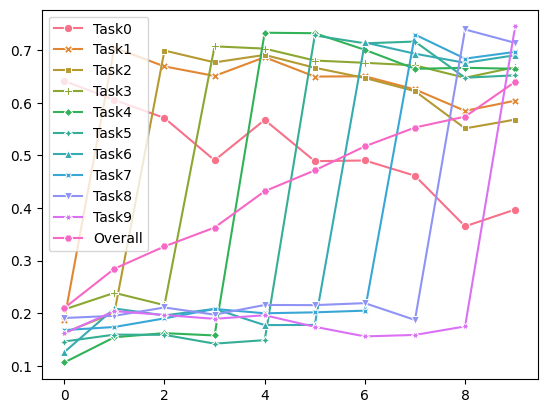

In [13]:
sns.lineplot(data=acc_df, dashes=False, markers=True)

# Store metrics

In [16]:
pickle.dump(acc_df, open(SAVED_METRICS_PATH / "sgd.pkl", "wb"))